In [18]:
!pip install gender_guesser

^C


In [19]:
import gender_guesser.detector as gender

In [23]:
d = gender.Detector()
print(d.get_gender(u"Sunil"))

mostly_male


In [2]:
import pandas as pd

In [3]:
#!pip install sweetviz

     ---------------------------------------- 15.1/15.1 MB 2.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import sweetviz as sv

In [8]:
sweet_report = sv.analyze(pd.read_csv("final_data3.csv"))

                                             |                                             | [  0%]   00:00 ->…

In [9]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
data = pd.read_csv("final_data3.csv")

*After calling the dataset, we can also make changes for the variables, or we can remove the variables, we can do whatever we need and then we can generate the report by using 'sweetviz'.

*We can also compare the train and test datasets in the report.


"The Sweetviz library generates a report having":
1. An overview of the dataset
2. Variable properties
3. Categorical associations
4. Numerical associations
5. Most frequent, smallest, largest values for numerical features

In [13]:
sweet_report = sv.analyze(data)

                                             |                                             | [  0%]   00:00 ->…

In [17]:
sweet_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



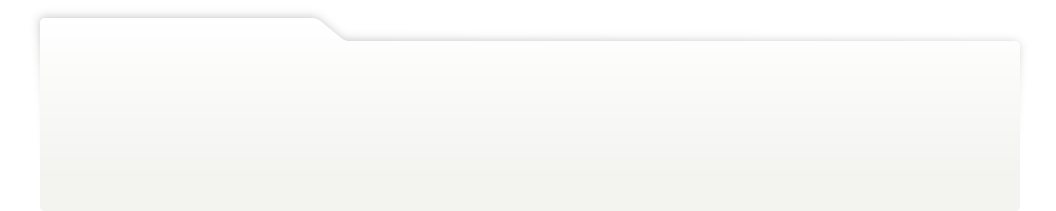
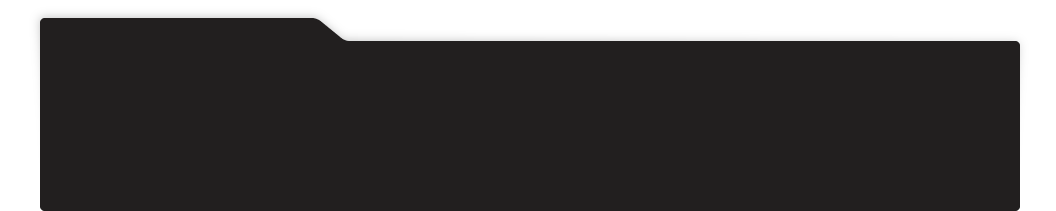
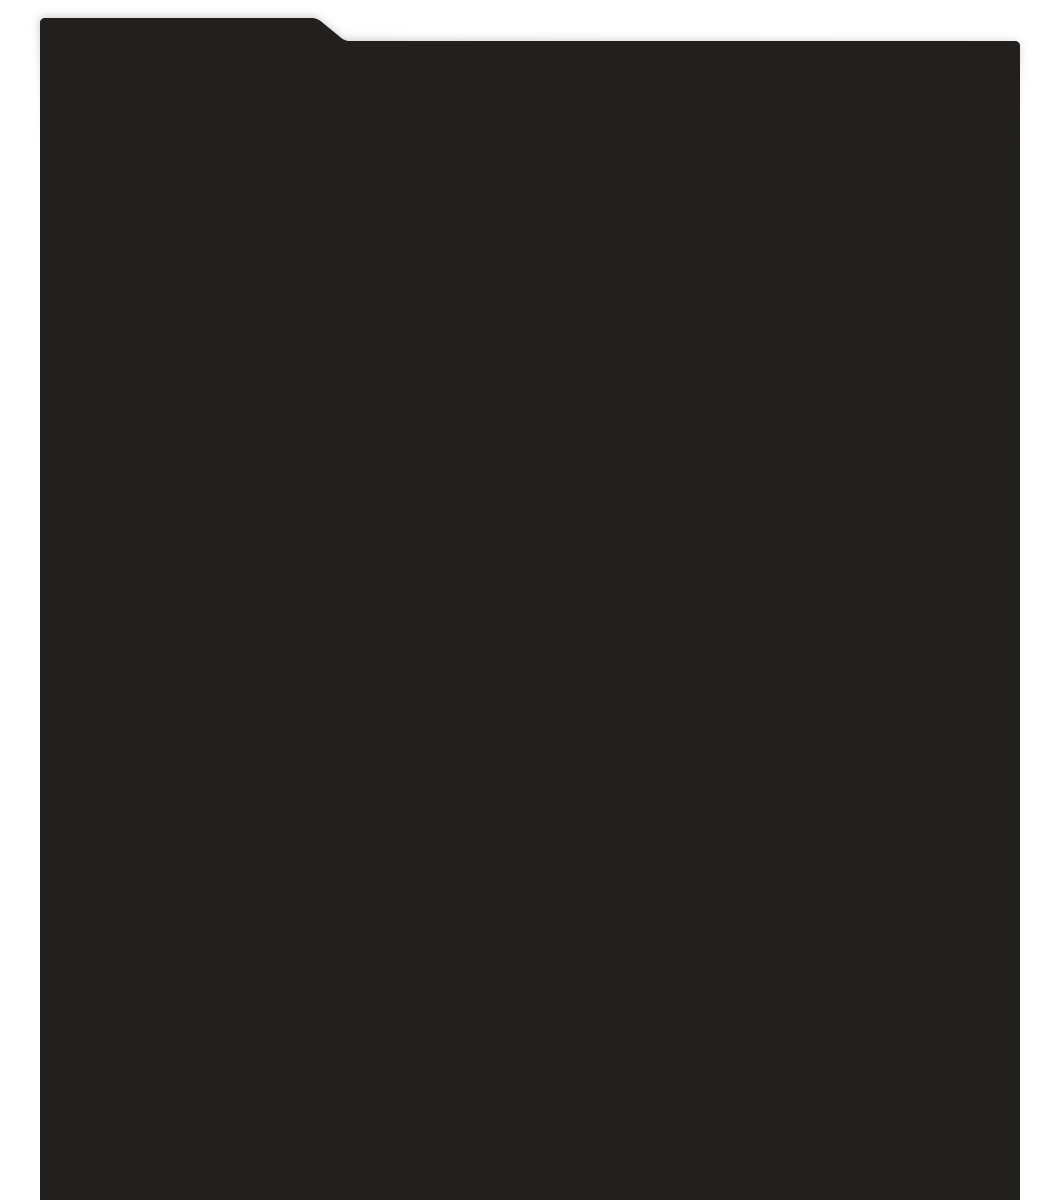
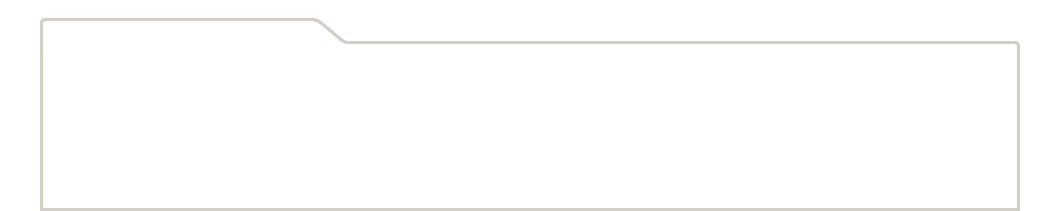
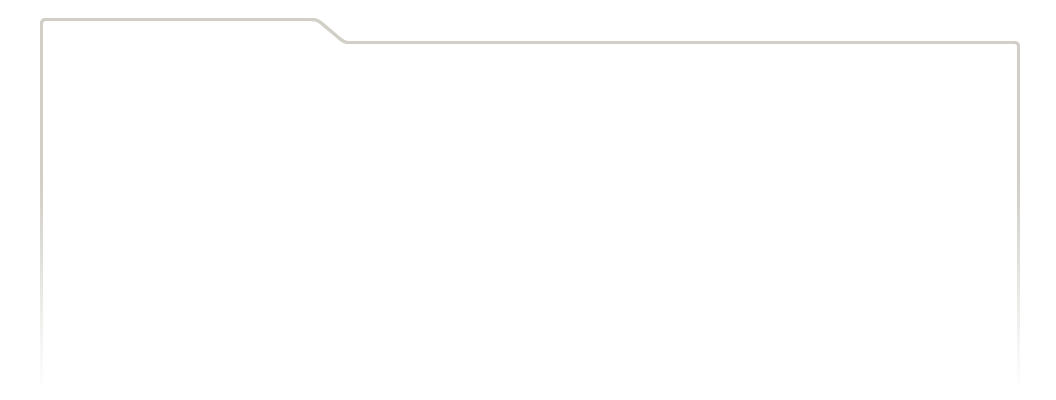
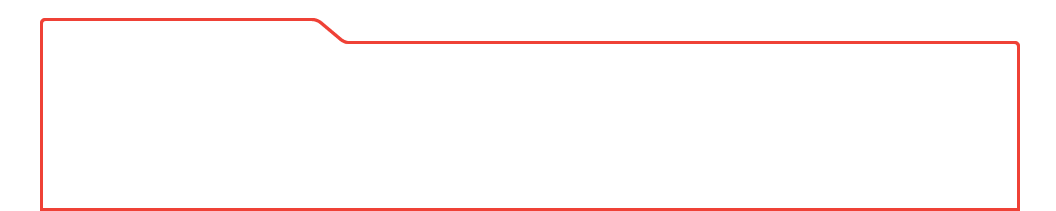
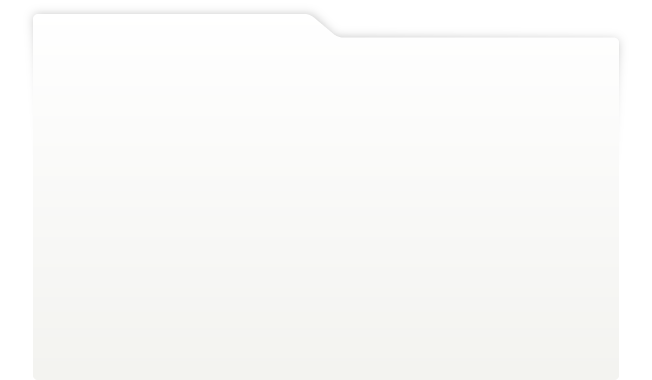
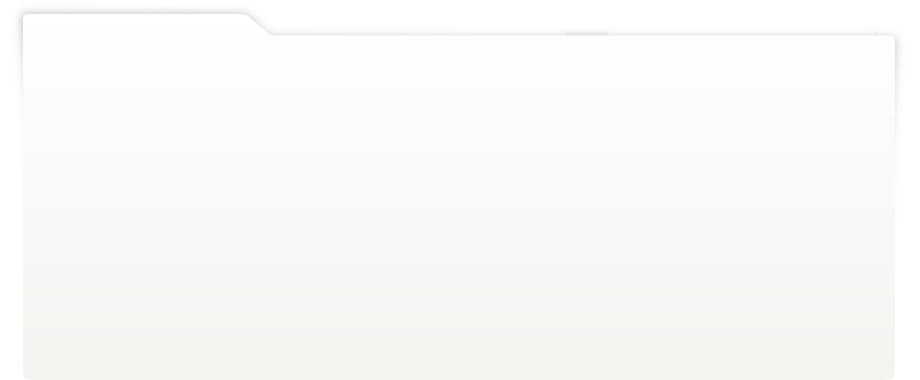
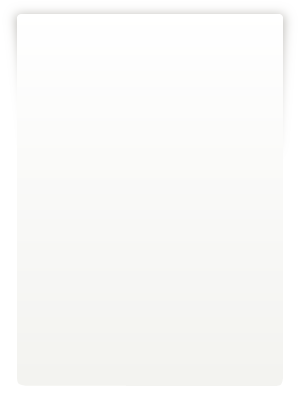
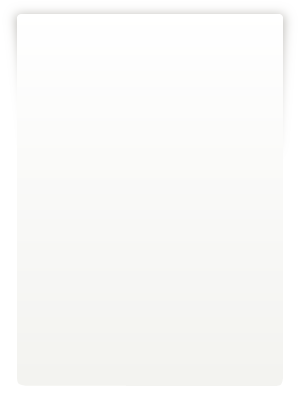
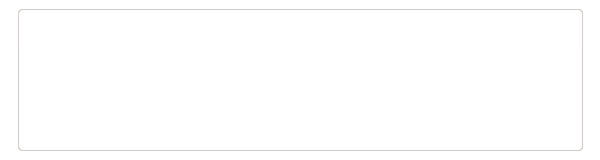
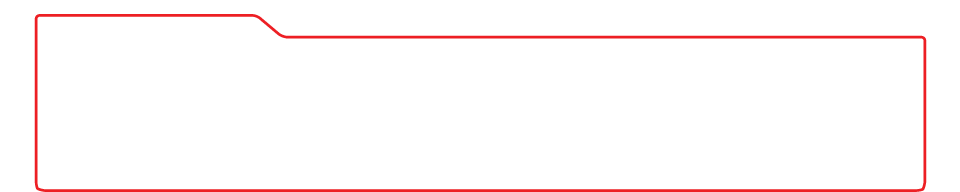
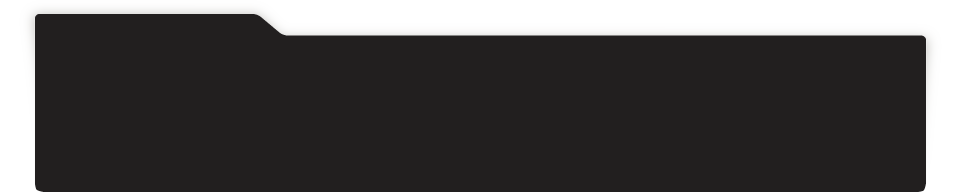
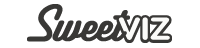
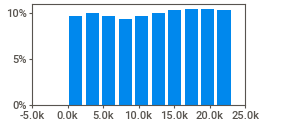
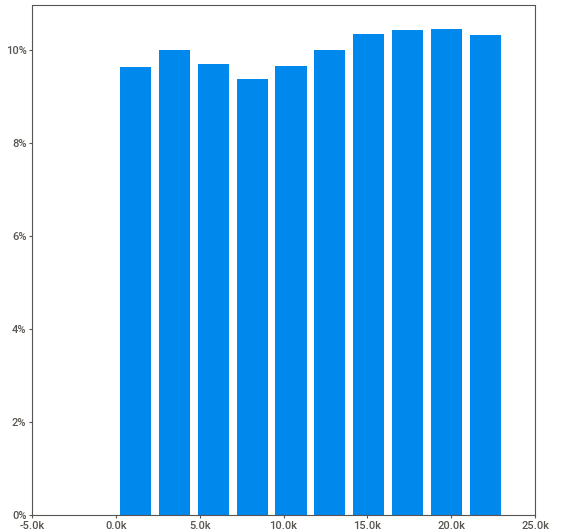
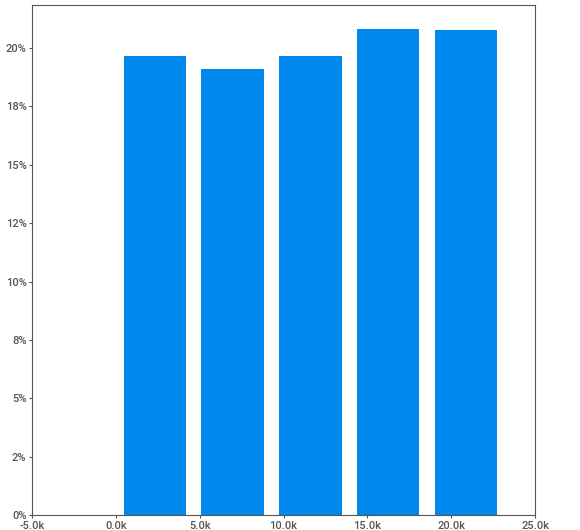
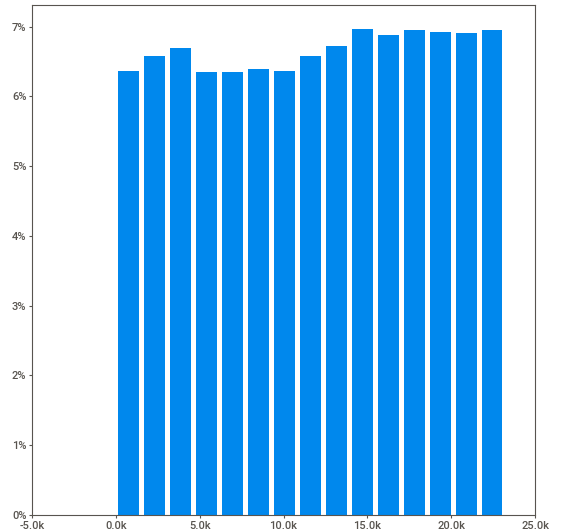
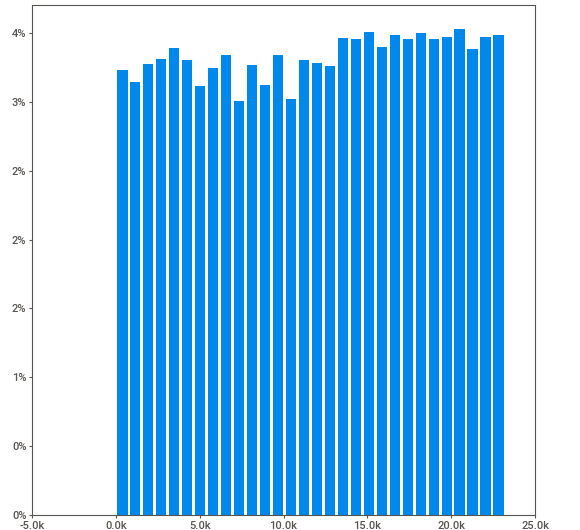
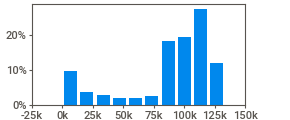
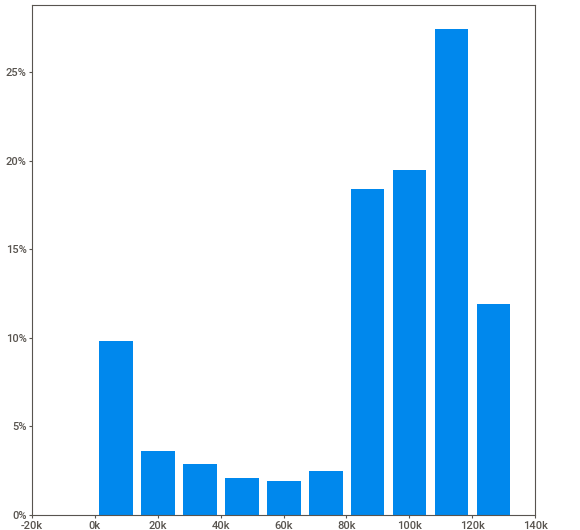
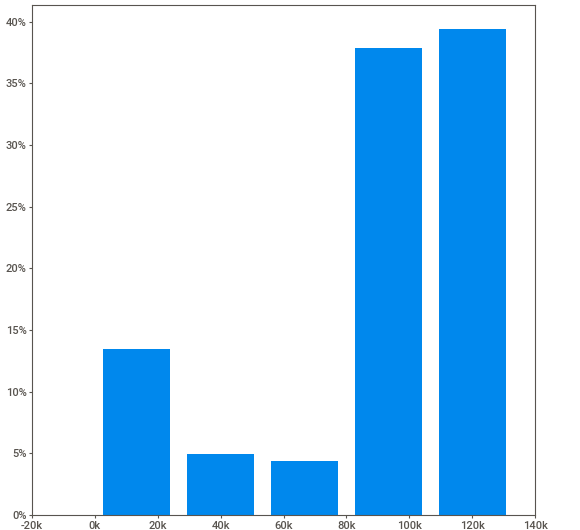
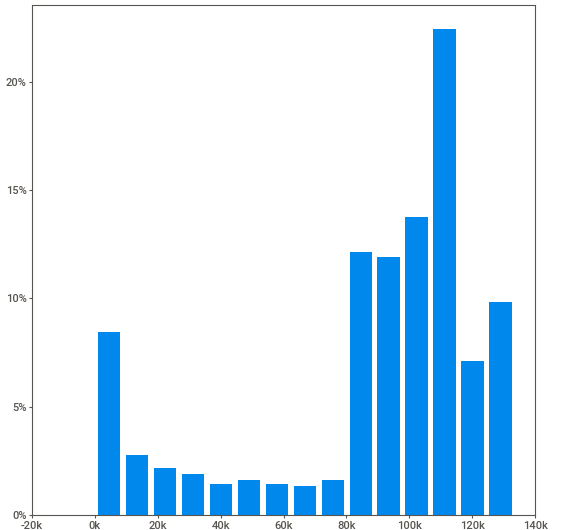
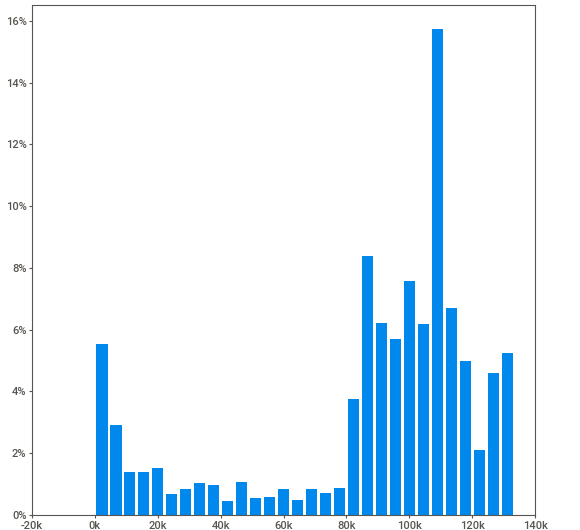
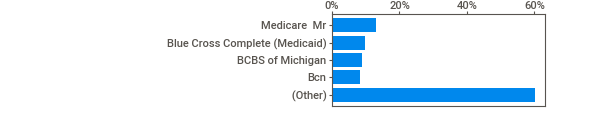
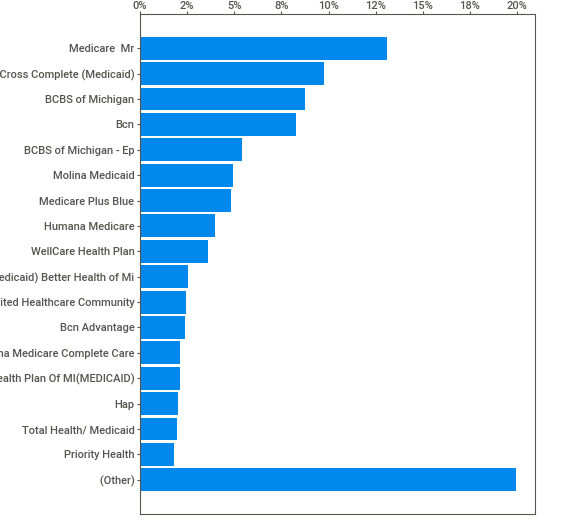
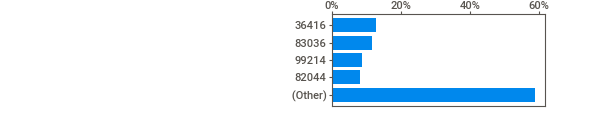
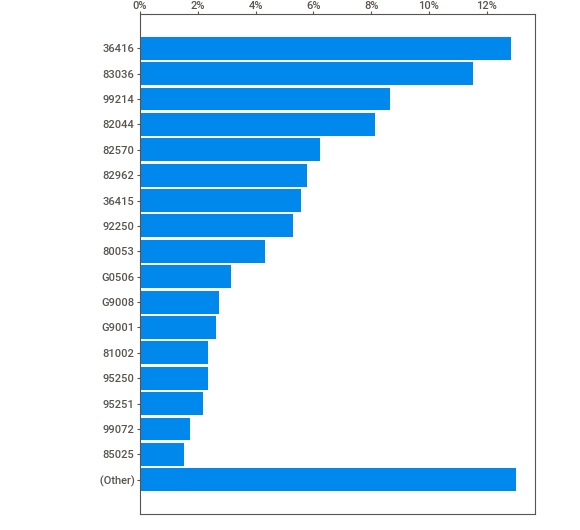
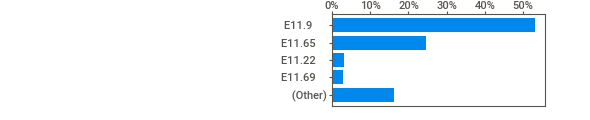
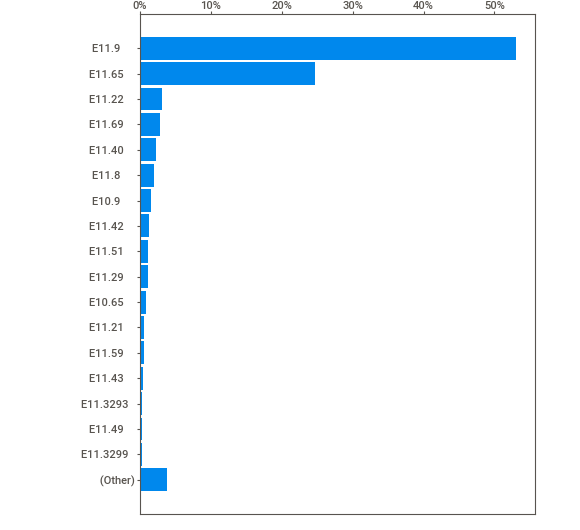
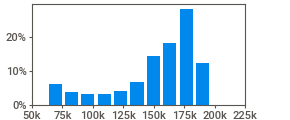
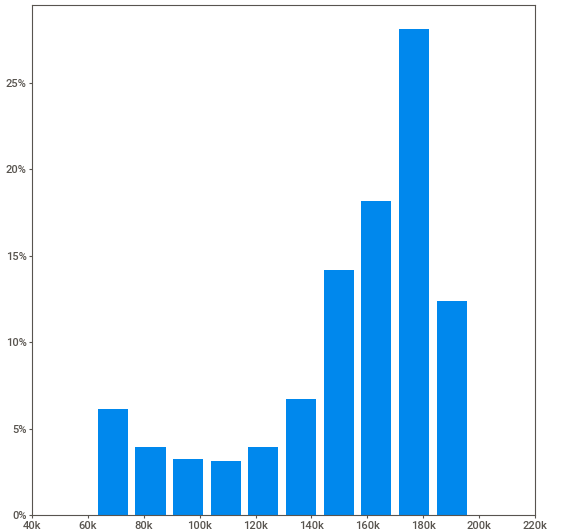
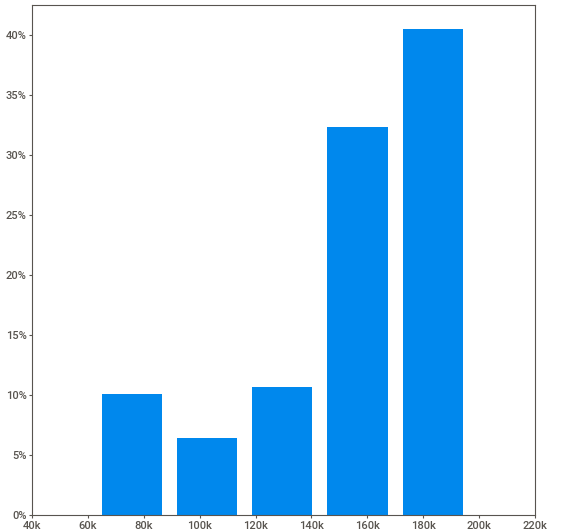
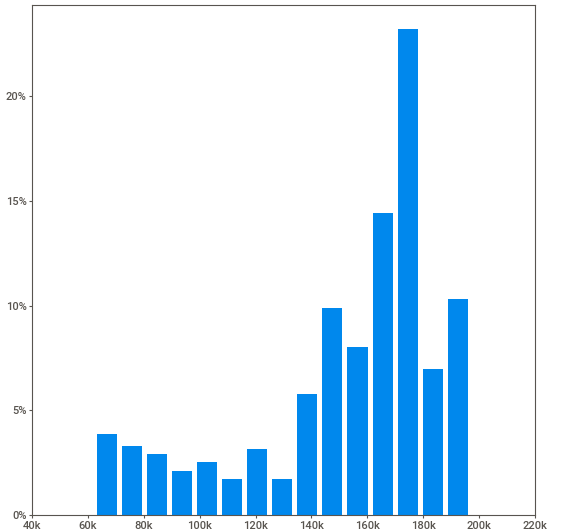
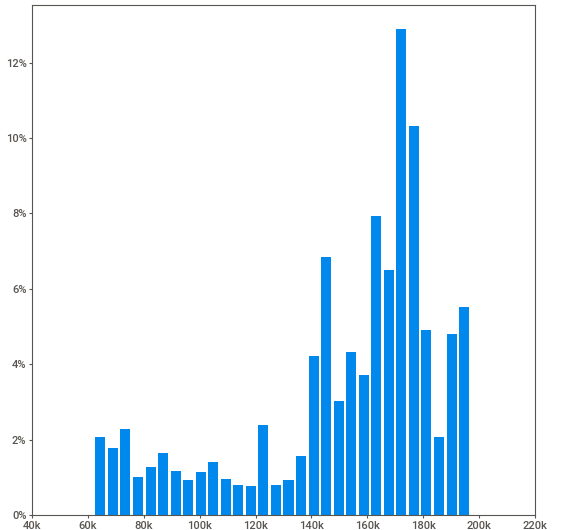
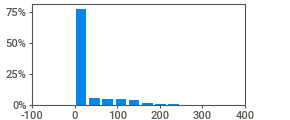
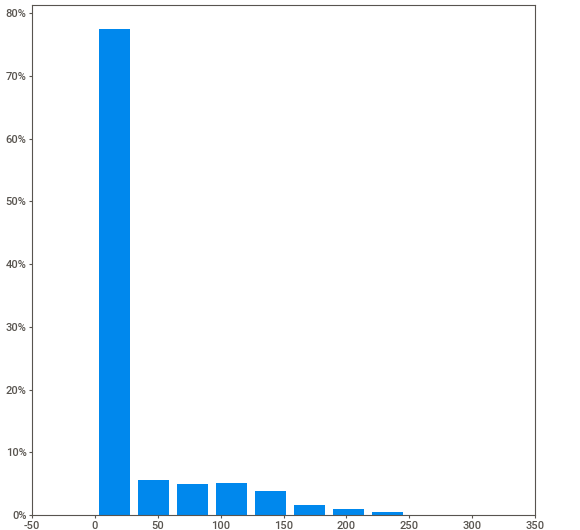
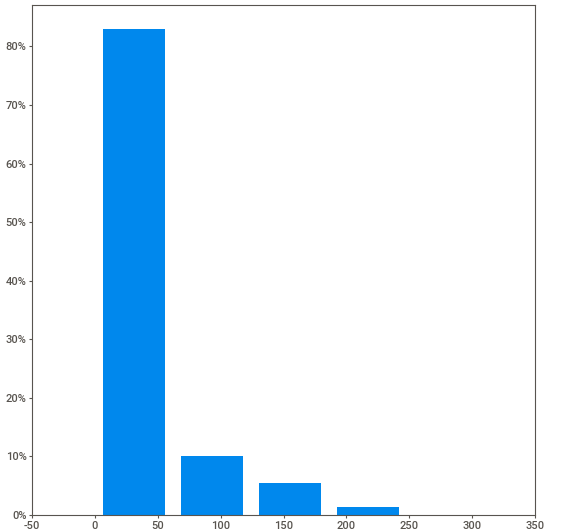
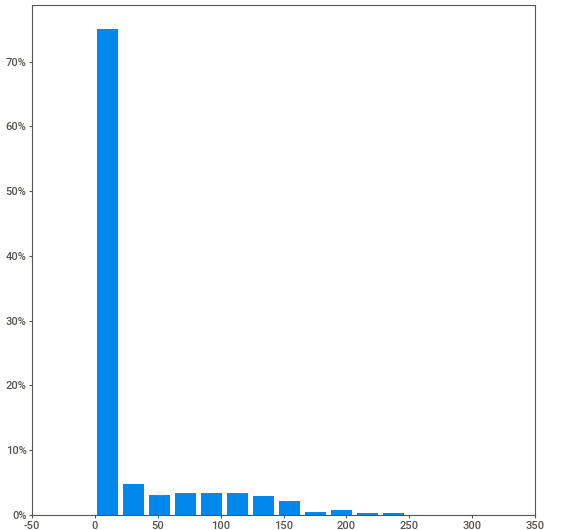
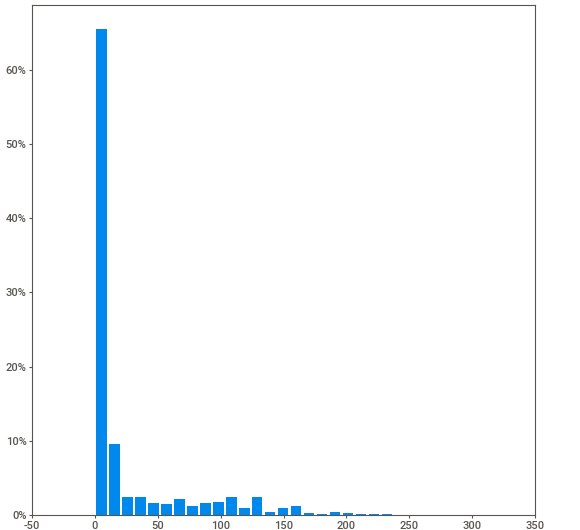
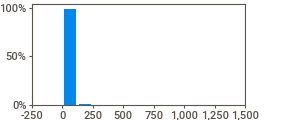
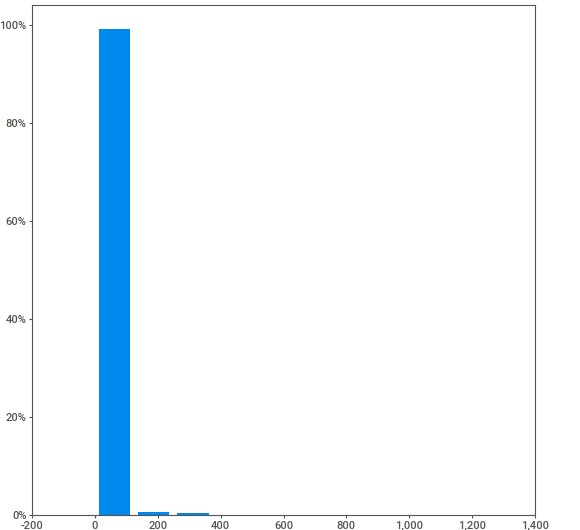
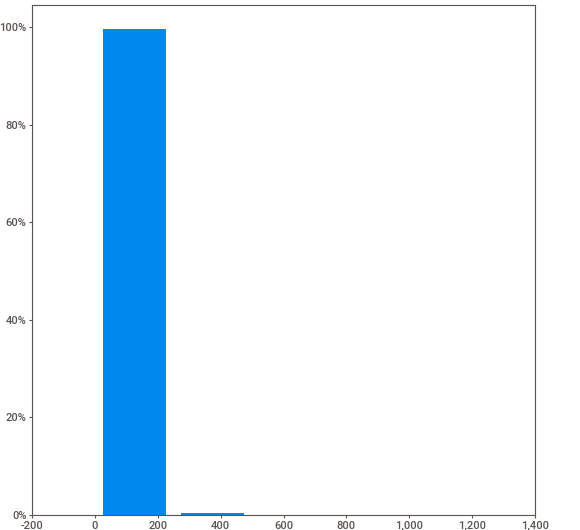
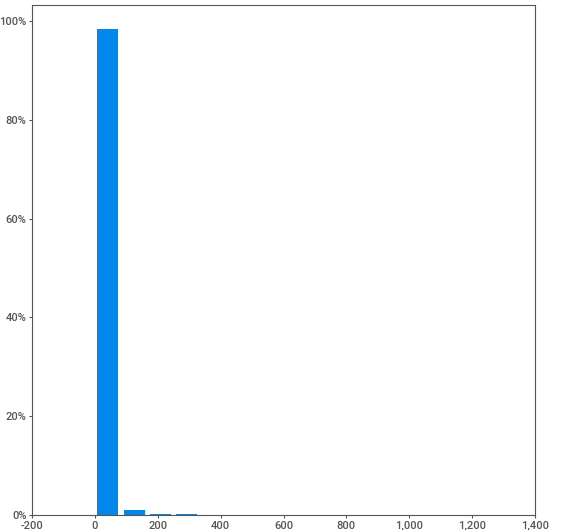
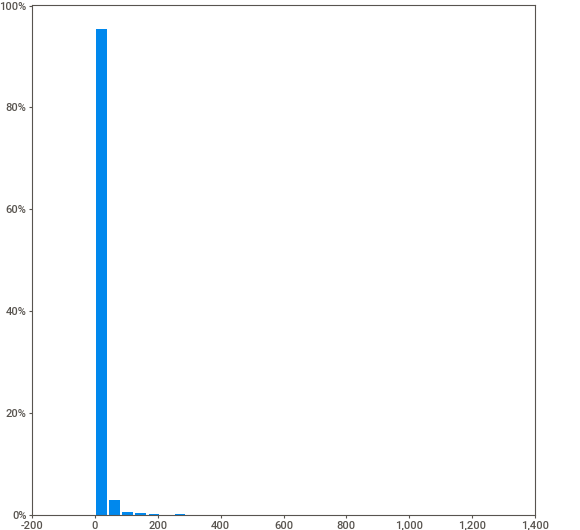
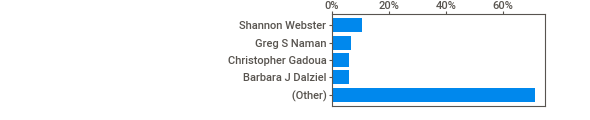
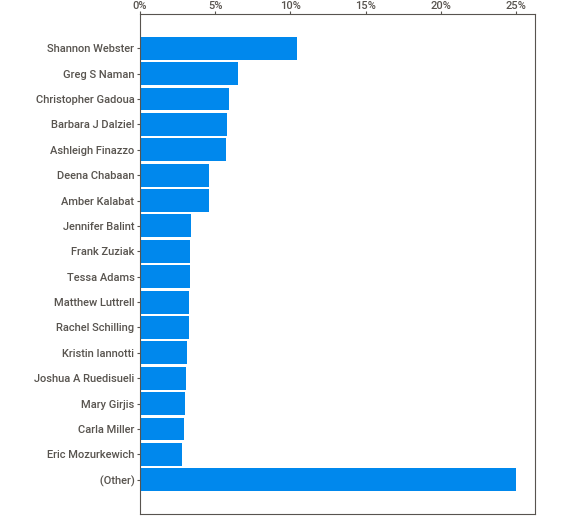
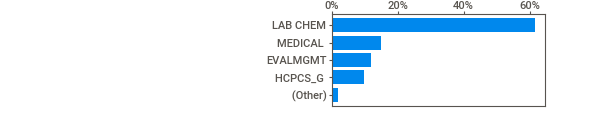
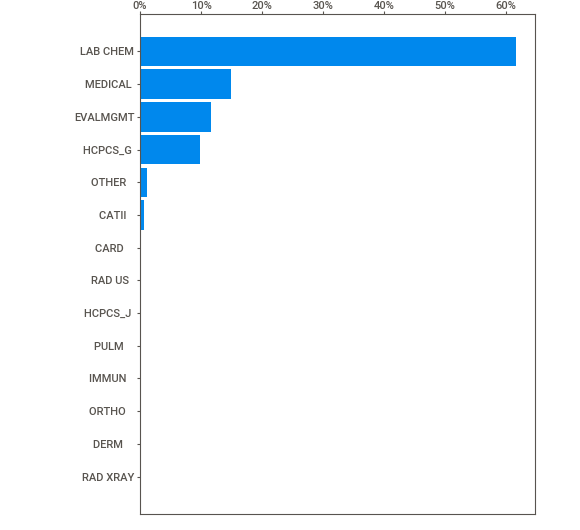
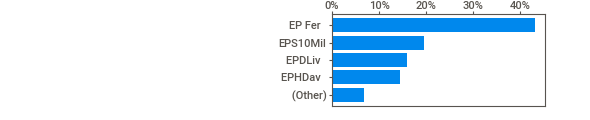
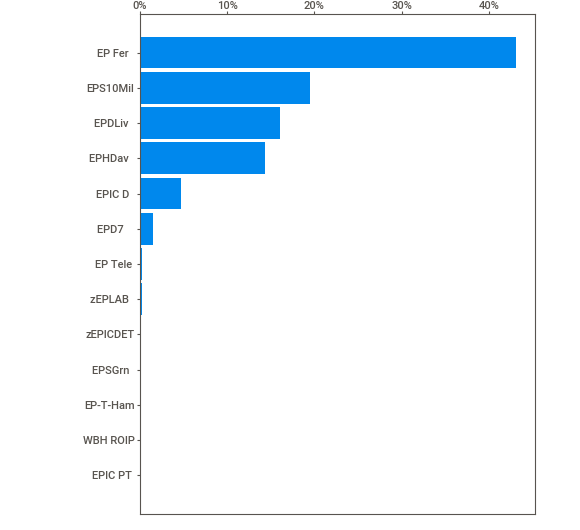
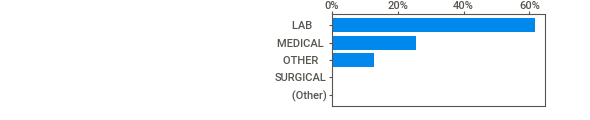
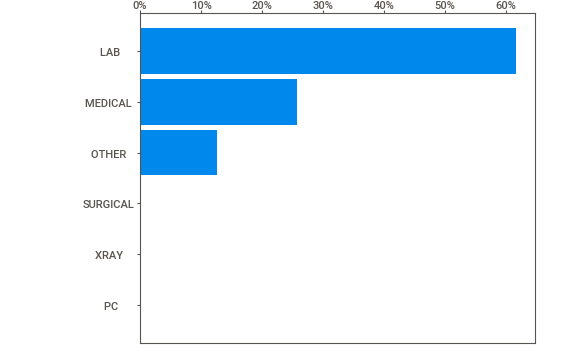
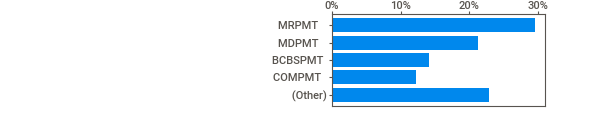
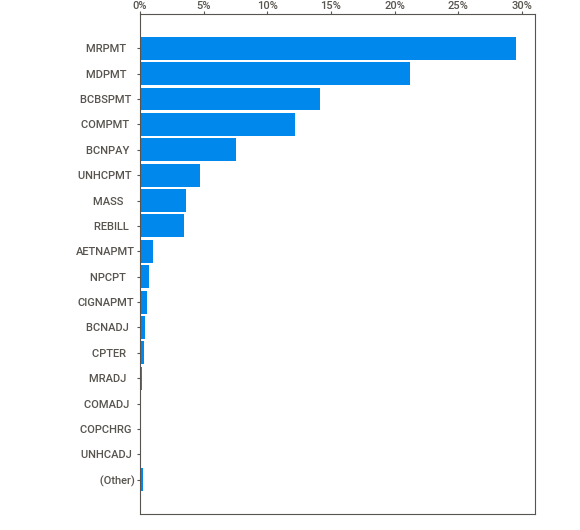
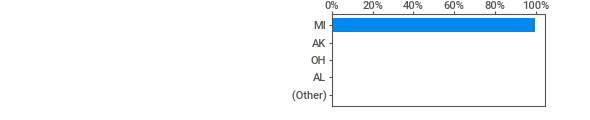
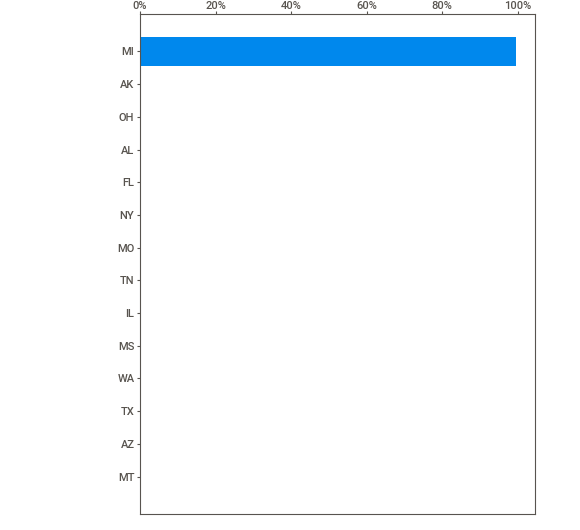
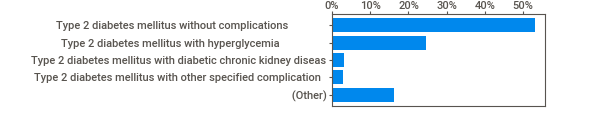
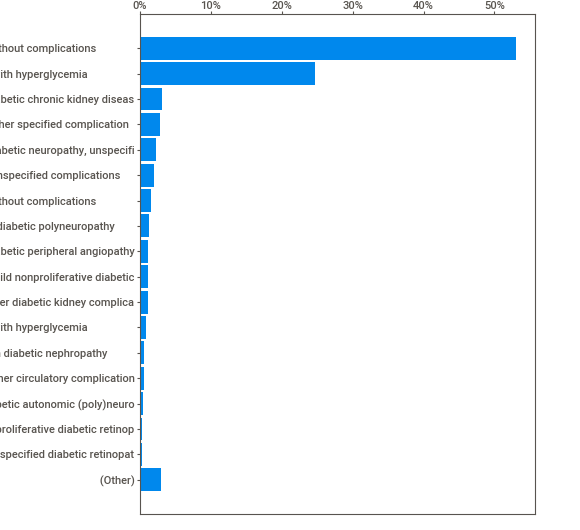
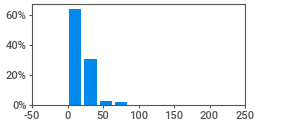
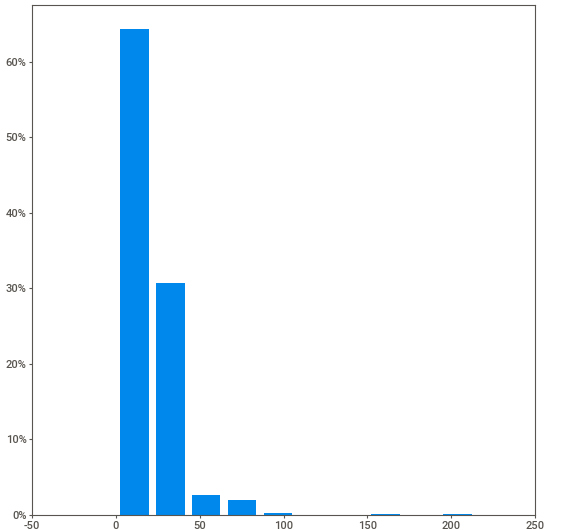
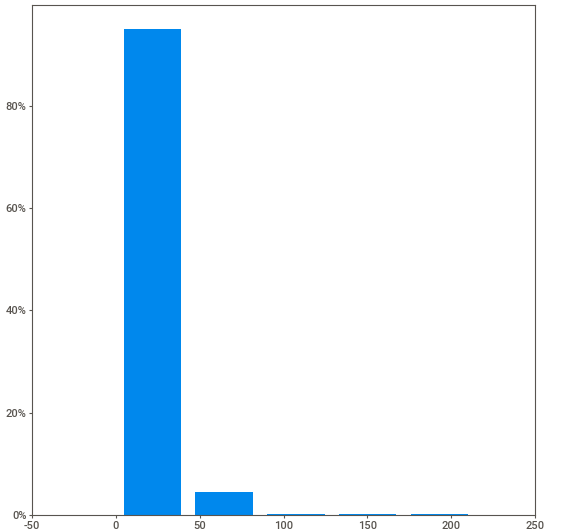
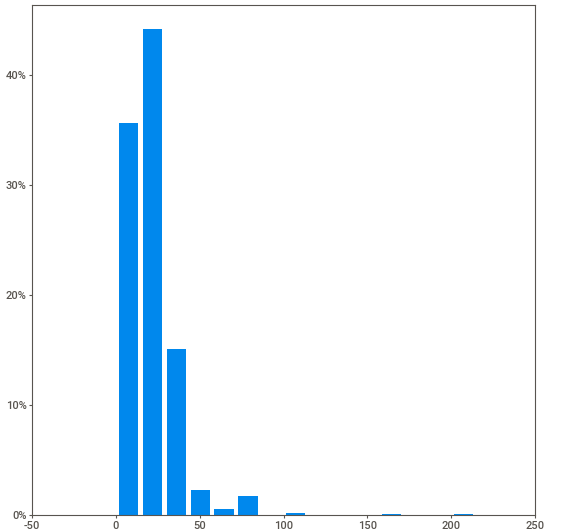
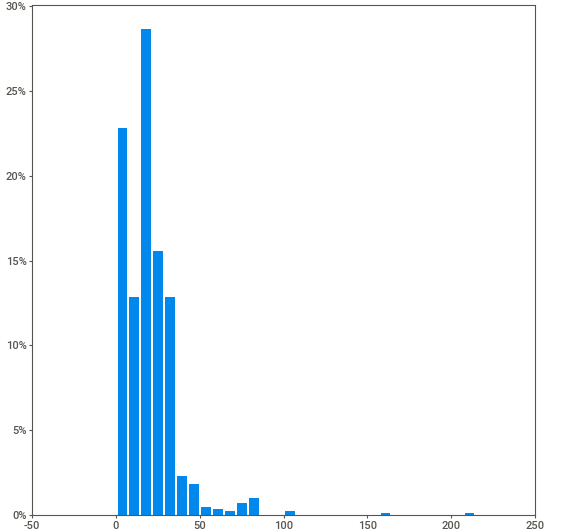
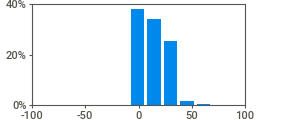
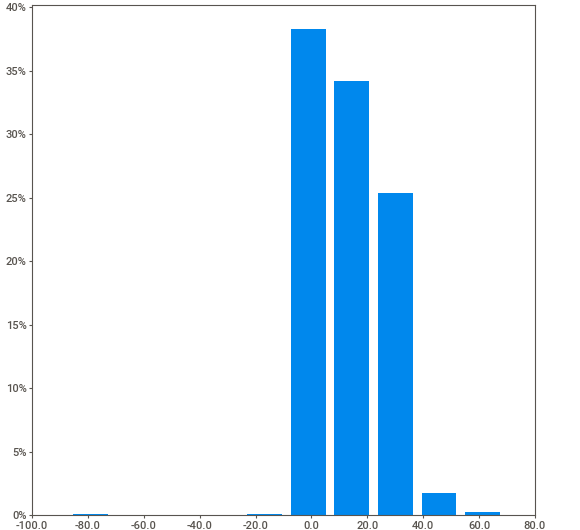
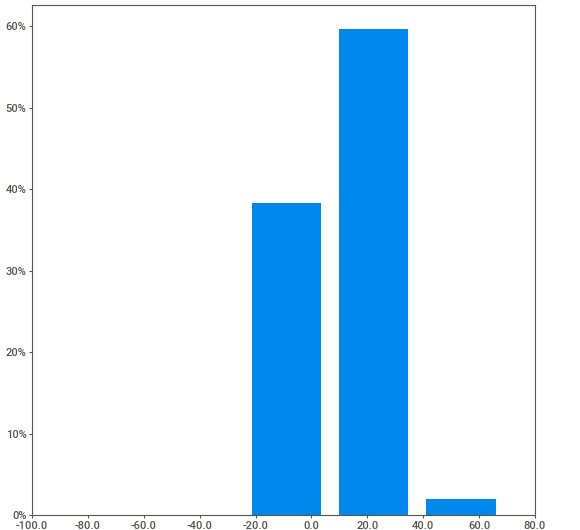
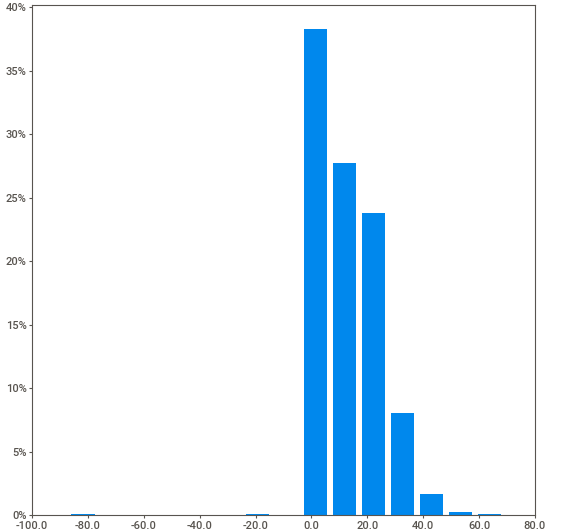
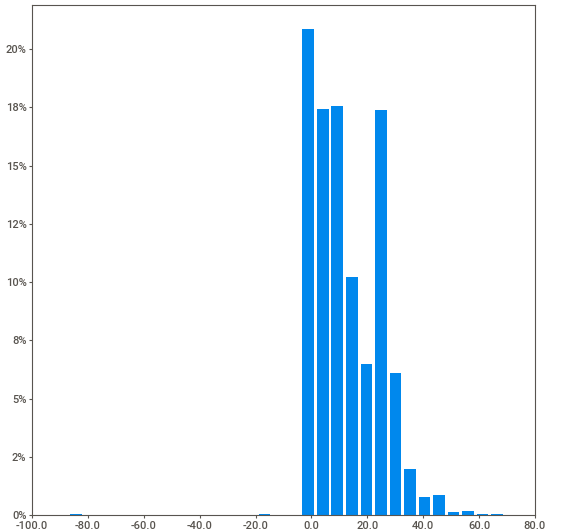
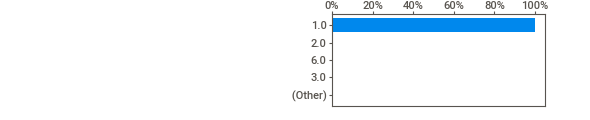
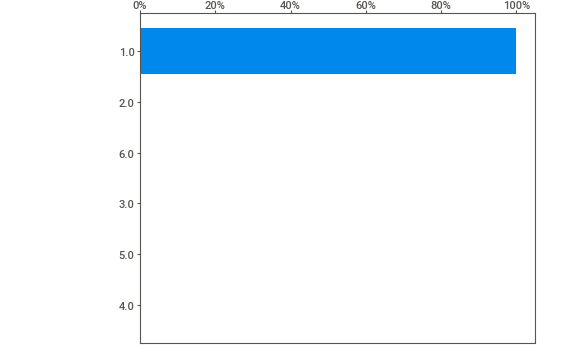
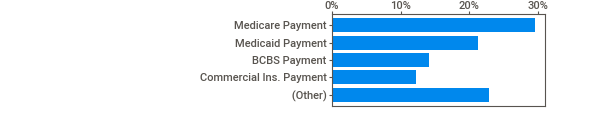
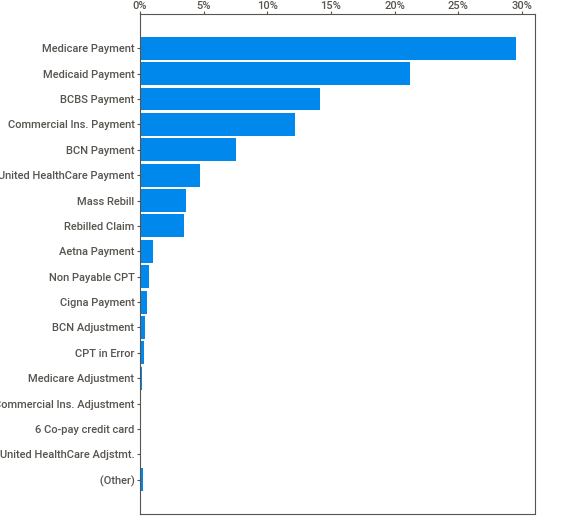
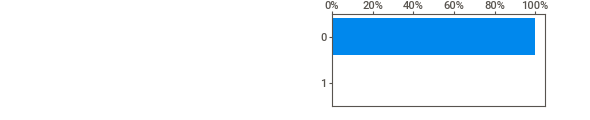
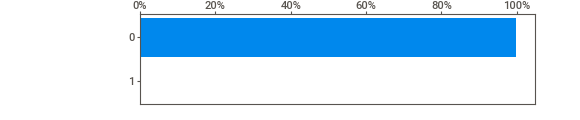
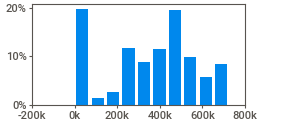
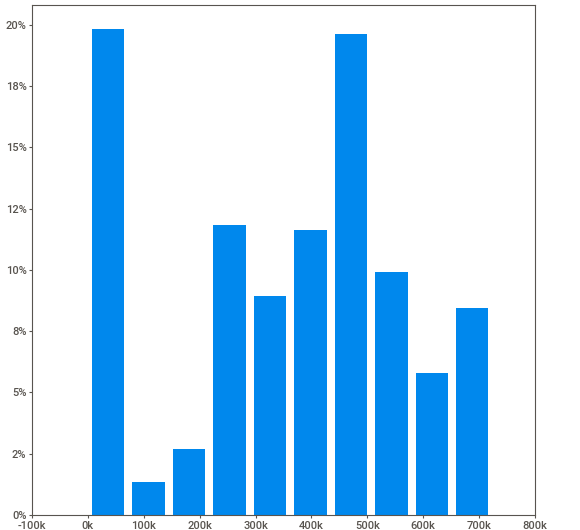
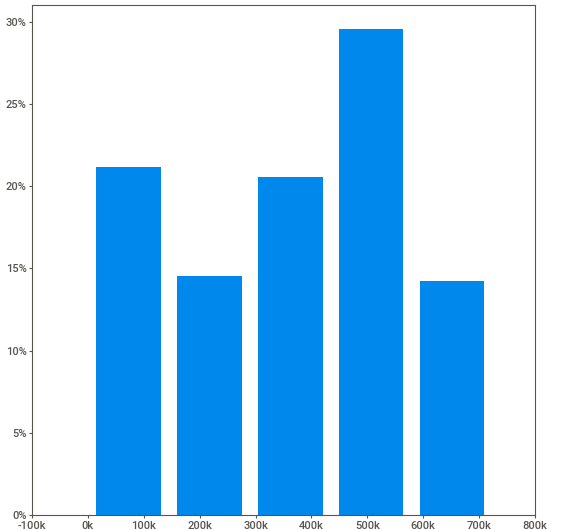
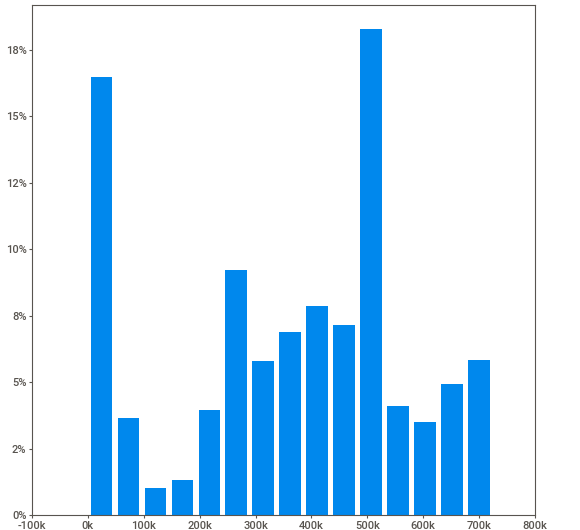
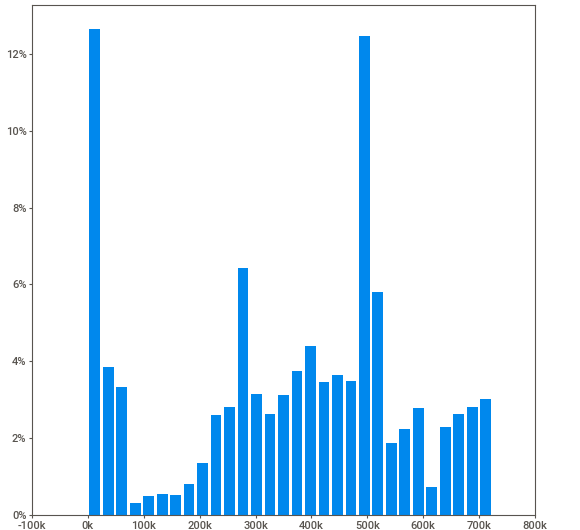
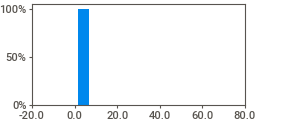
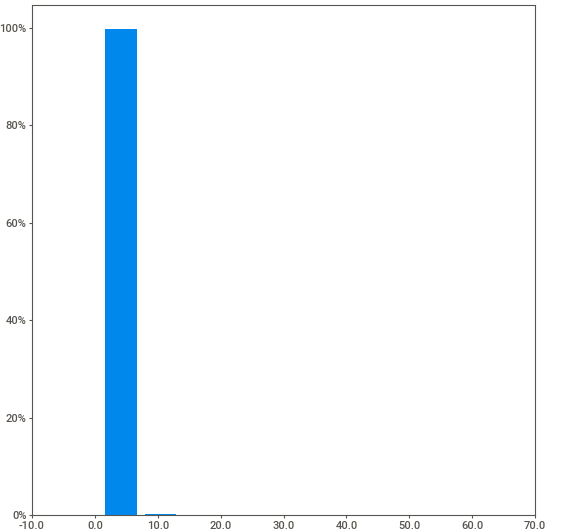
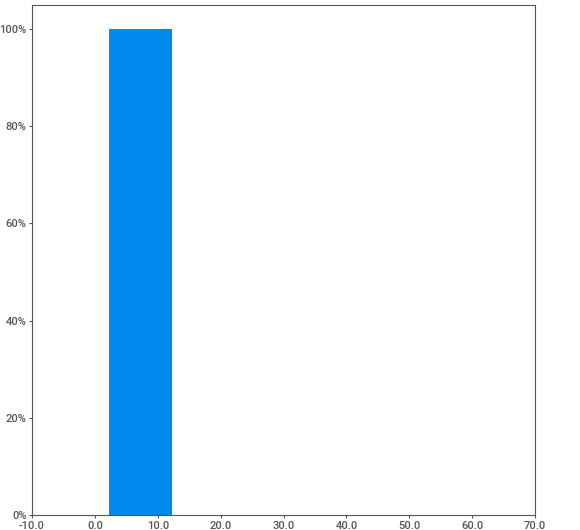
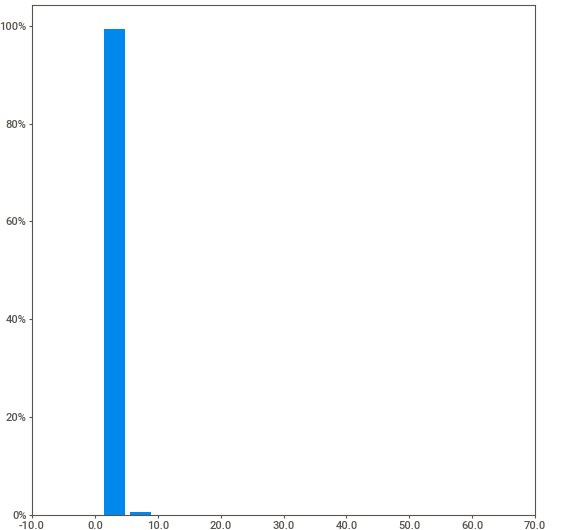
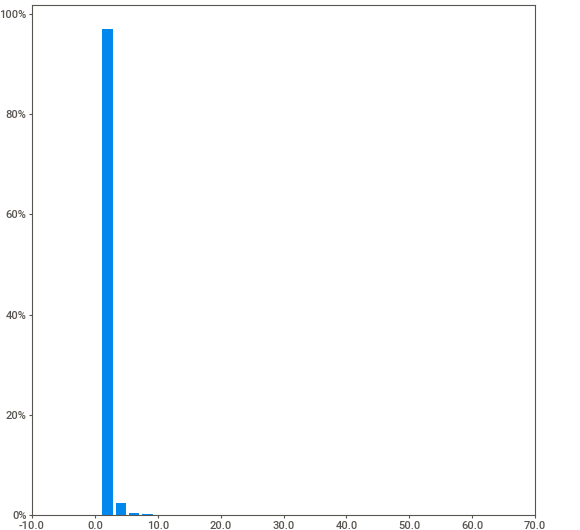
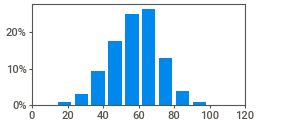
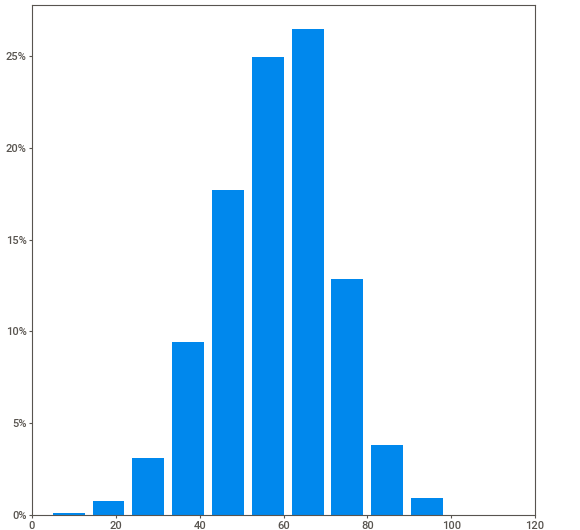
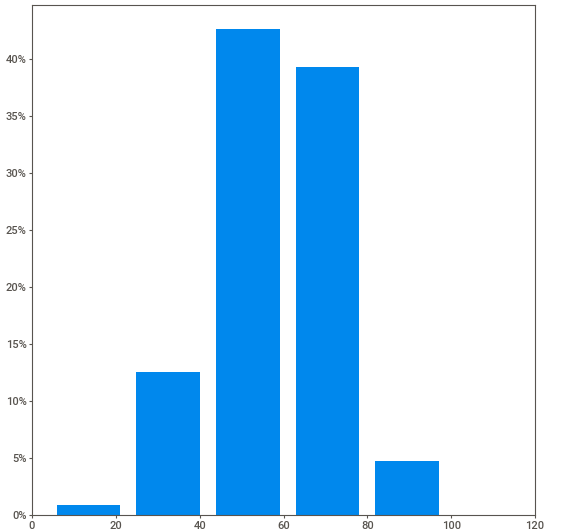
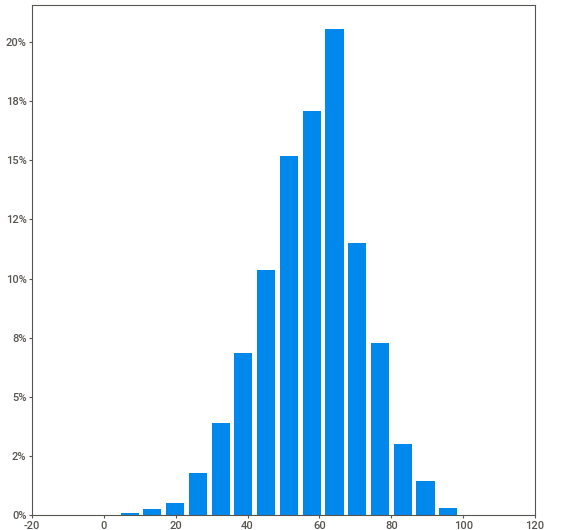
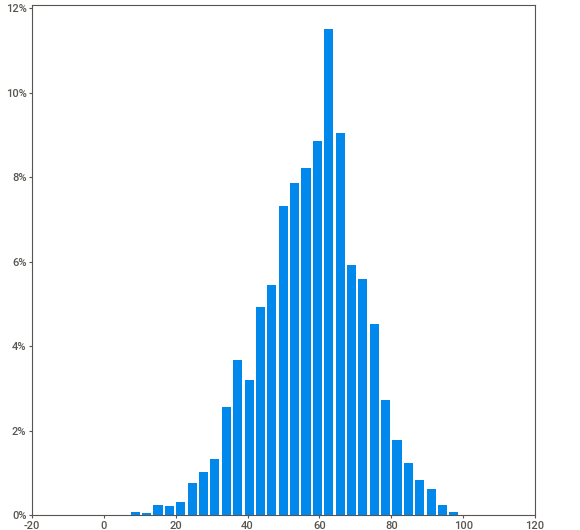
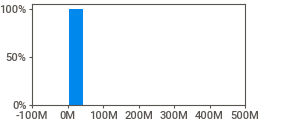
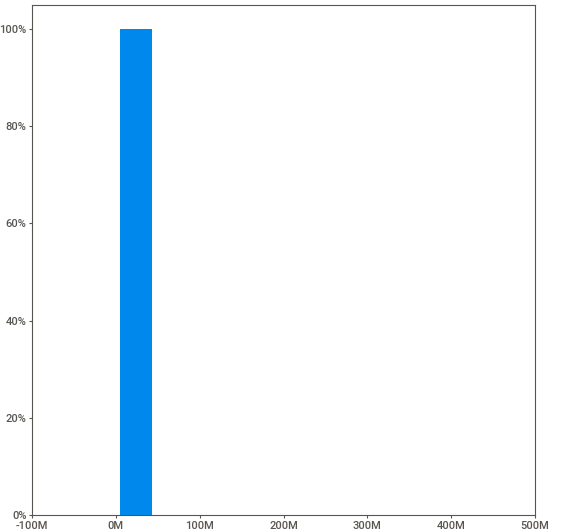
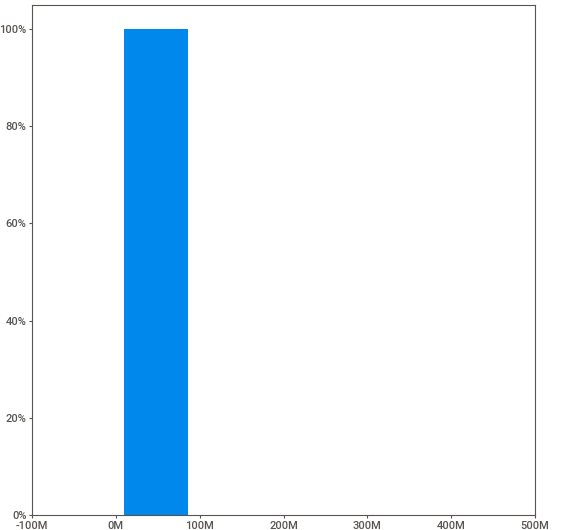
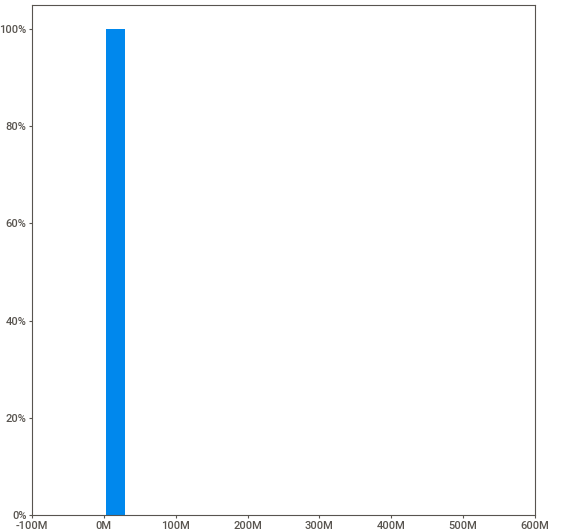
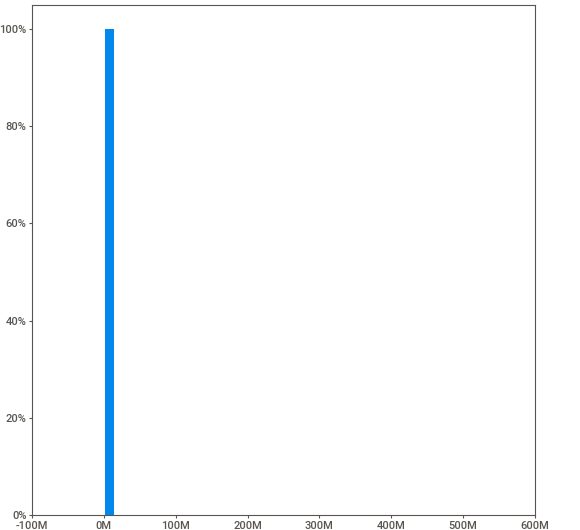
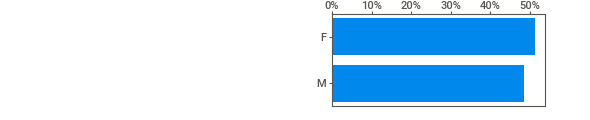
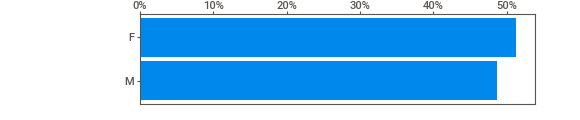
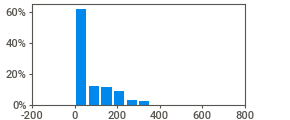
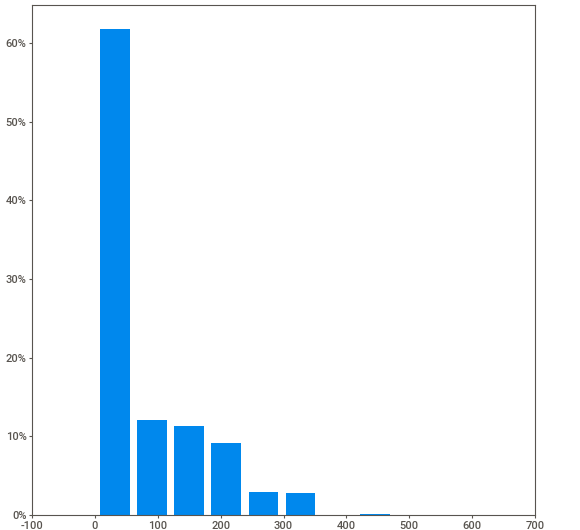
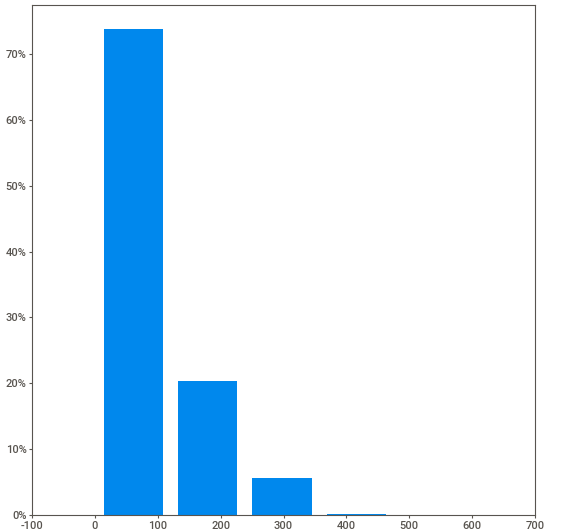
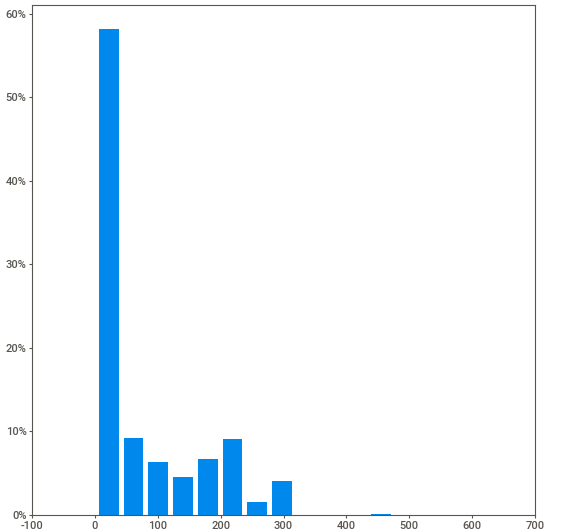
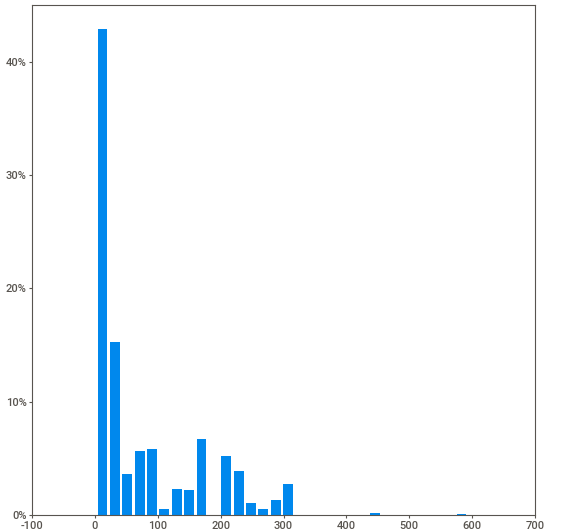
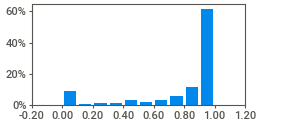
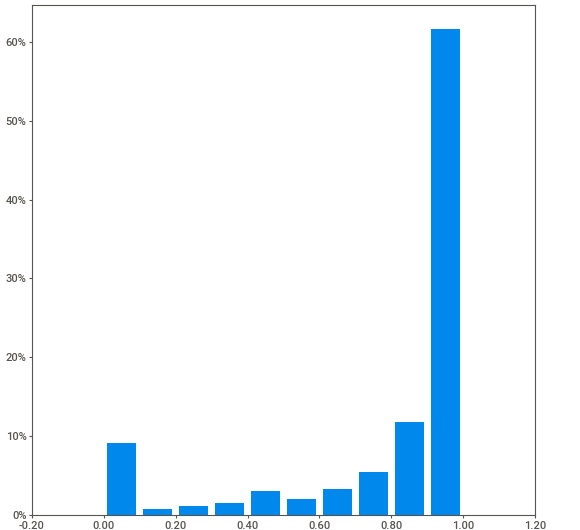
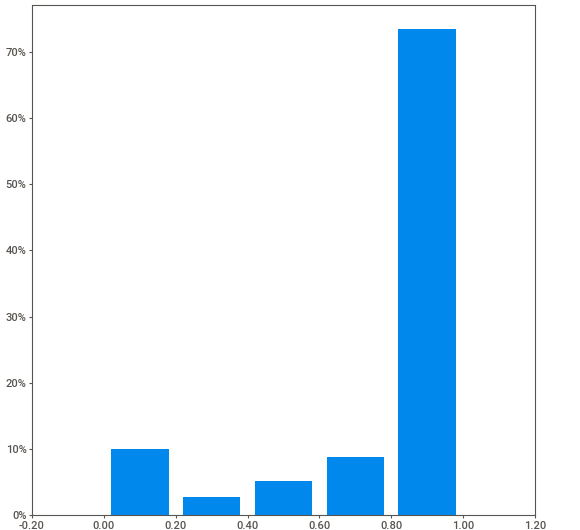
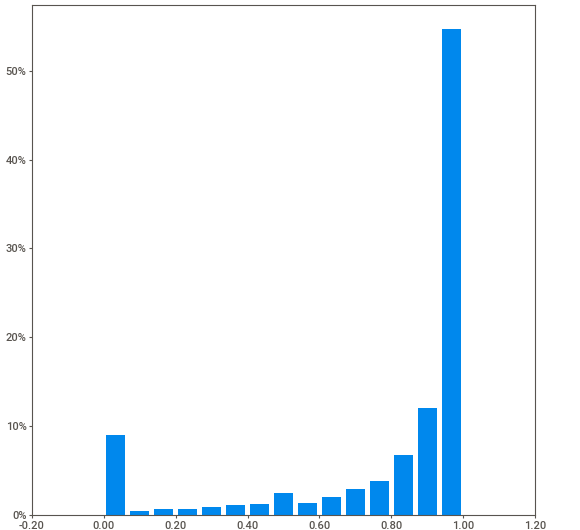
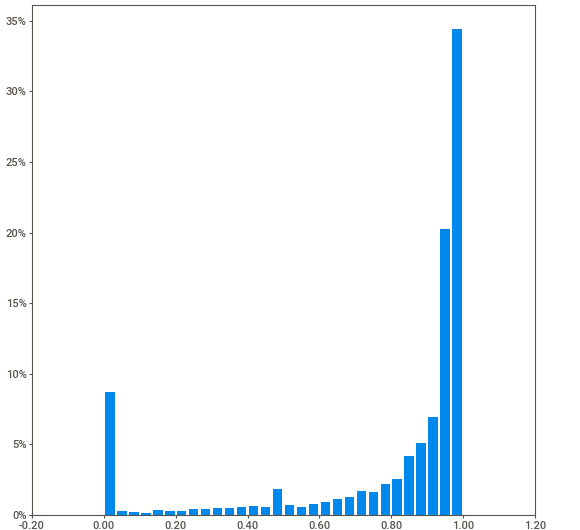
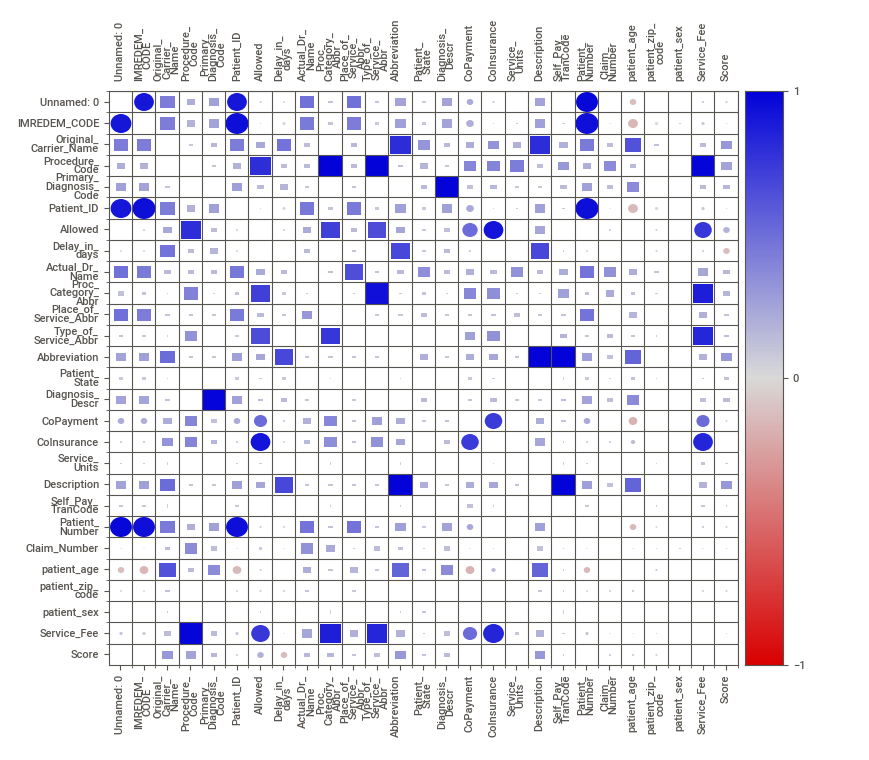
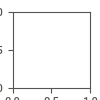

In [16]:
'''import IPython
IPython.display.HTML('sweet_report.html')'''

In [24]:
import pandas as pd


class Integration:

    def integration(self, rule_engine_recommended_code, ml_recommendation, patient_id, patient_number):
        """takes dictionary, lists, patient id as inputs and returns pandas dataframe"""

        resultant_df = dict()
        if len(ml_recommendation) != 0:

            pro_code_l1 = ml_recommendation[patient_number]["Procedure_Code"]
            score_l1 = ml_recommendation[patient_number]["Predicted_Score"]

            procedure_code2 = []
            score2 = []

            for k, v in rule_engine_recommended_code.items():
                procedure_code2.append(k)
                score2.append(v)

            for i in procedure_code2:
                pro_code_l1.append(i)
            for i in score2:
                score_l1.append(i)

            # creating a mesh of keys with empty values list
            res = {key: [] for key in pro_code_l1}

            # loop to iterate through keys and values
            for key, val in zip(pro_code_l1, score_l1):
                res[key].append(val)

            for k, v in res.items():
                if res[k][0] in [str(0), str(1)]:
                    res[k].insert(0, None)

            final_proc_codes = pd.DataFrame(list(res.values()), index=res.keys())
            final_proc_codes["Patient_ID"] = patient_id
            final_proc_codes.reset_index(inplace=True)
            final_proc_codes.rename(columns={'index': 'Proc_code', 0: 'Pred_score', 1: 'Eligibility'}, inplace=True)
            final_proc_codes['Pred_score'] = final_proc_codes['Pred_score'].fillna(0)
            final_proc_codes = final_proc_codes.query("Eligibility=='1'")
            final_proc_codes = final_proc_codes.reset_index(drop=True)  # Applying reset_index function
            first_column = final_proc_codes.pop('Patient_ID')
            final_proc_codes.insert(0, 'Patient_ID', first_column)

            final_proc_codes = final_proc_codes.loc[:, ["Proc_code", "Pred_score"]]
            res = final_proc_codes.to_dict("list")

            resultant_df[patient_number] = res

        else:
            Proc_code = list(rule_engine_recommended_code.keys())
            Pred_score = [0 for i in range(len(rule_engine_recommended_code.keys()))]
            final_proc_codes = pd.concat(
                [pd.Series(Proc_code, name="Proc_code"), pd.Series(Pred_score, name="Pred_score")], axis=1)
            res = final_proc_codes.to_dict("list")

            resultant_df[patient_number] = res

        return resultant_df


In [ ]:
{
"Patient_ID":76238,
"recomendedCode": {
        "83036": "1",
        "81002": "1",
        "82044": "1",
        "82570": "1",
        "80053": "1",
        "80061": "1",
        "84443": "1",
        "95250": "1",
        "2028F": "1",
        "92250": "1",
        "2022F": "1",
        "2026F": "1",
        "93922": "1",
        "93000": "1",
        "95251": "1"
    }
}

In [5]:
import pandas as pd
recomendedCode = { '83036': '0', '81002': '1', '82044': '1', '82570': '1', '80053': '1',
                    '80061': '1', '84443': '1', '95250': '1'}
procedure_code1 = ['81002', '80061','80053', '93000', '82570', '2028F', '2022F', '2026F','87649','27632',
                   '73829','74838','73664','G9007', '80053', '95251', '84443', '95250', 'G9008',
                   '92250', 'G9002', 'G9001']
score1 = [0.12, 0.11, 0.11, 0.06, 2.22,1.34,8.66,2.89,0.06, 0.88, 0.87, 0.85, 0.84, 0.82,
          0.82,0.82, 0.8, 0.77,0.55, 0.60, 0.0, 0.0]
Patient_ID = 71094

def patient_df(Patient_ID,rec_code_dict, pro_code_l1, score_l1):
    
    '''takes dictionary, lists, patient id as inputs and returns pandas dataframe'''

    procedure_code2 = [k for k,v in rec_code_dict.items() if v == '1']
    list_val = []
    for k in procedure_code2:
        if k in pro_code_l1:
            pos = pro_code_l1.index(k)
            sco = score_l1[pos]
            list_val.append([k,sco,1])
    
    
    final_proc_codes = pd.DataFrame(list_val,columns=['procedureCode','Pred_score','Eligibility'])
    final_proc_codes['PatientID'] = Patient_ID

    return final_proc_codes

res = patient_df(Patient_ID,recomendedCode, procedure_code1, score1)
res

,procedureCode,Pred_score,Eligibility,PatientID
0,81002,0.12,1,71094
1,82570,2.22,1,71094
2,80053,0.11,1,71094
3,80061,0.11,1,71094
4,84443,0.80,1,71094
5,95250,0.77,1,71094
